Saving vco_dataset_dc7.txt to vco_dataset_dc7.txt
Saving vco_dataset_dc8.txt to vco_dataset_dc8.txt
Saving vco_dataset_dc9.txt to vco_dataset_dc9.txt
Saving vco_dataset_dc85.txt to vco_dataset_dc85.txt
Saving vco_dataset_dc95.txt to vco_dataset_dc95.txt
Saving vco_dataset_pulse.txt to vco_dataset_pulse.txt
Saving vco_dataset_sin.txt to vco_dataset_sin.txt
Saving vco_dataset_steps.txt to vco_dataset_steps.txt
Saving vco_dataset_triang.txt to vco_dataset_triang.txt
Saving vco_dataset_dc6.txt to vco_dataset_dc6.txt
Saving vco_dataset_dc1.txt to vco_dataset_dc1.txt
Loaded: vco_dataset_dc7.txt, Shape: (2008, 3)
Loaded: vco_dataset_dc8.txt, Shape: (2008, 3)
Loaded: vco_dataset_dc9.txt, Shape: (2008, 3)
Loaded: vco_dataset_dc85.txt, Shape: (2008, 3)
Loaded: vco_dataset_dc95.txt, Shape: (2008, 3)
Loaded: vco_dataset_pulse.txt, Shape: (2019, 3)
Loaded: vco_dataset_sin.txt, Shape: (2008, 3)
Loaded: vco_dataset_steps.txt, Shape: (2032, 3)
Loaded: vco_dataset_triang.txt, Shape: (2011, 3)
Loaded: v

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 10, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 10, 32)         │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 10, 1)          │            33 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,313 (83.25 KB)

 Trainable params: 21,313 (83.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - loss: 0.2010 - val_loss: 0.1758
Epoch 2/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - loss: 0.1777 - val_loss: 0.1747
Epoch 3/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.1767 - val_loss: 0.1765
Epoch 4/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - loss: 0.1759 - val_loss: 0.1748
Epoch 5/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - loss: 0.1761 - val_loss: 0.1743
Epoch 6/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - loss: 0.1761 - val_loss: 0.1744
Epoch 7/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.1771 - val_loss: 0.1749
Epoch 8/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.1763 - val_loss: 0.1743
Epoch 9/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - loss: 0.1758 - val_loss: 0.1747
Epoch 10/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.1771 - val_loss: 0.1749
Epoch 11/30
993/993 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.1767 - val_loss: 0.1744
Epoch 12/30
993/993 ━━━━━━━━━━

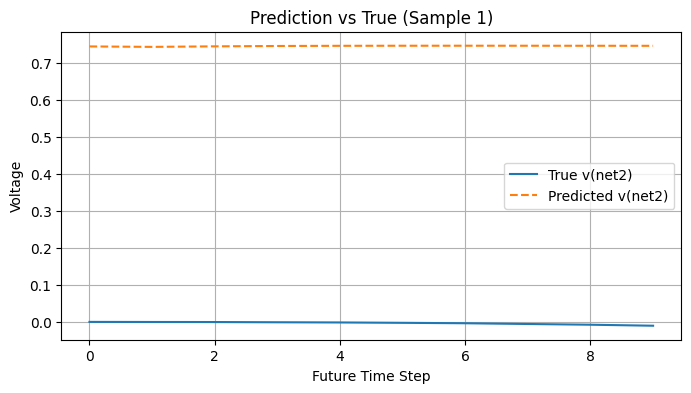

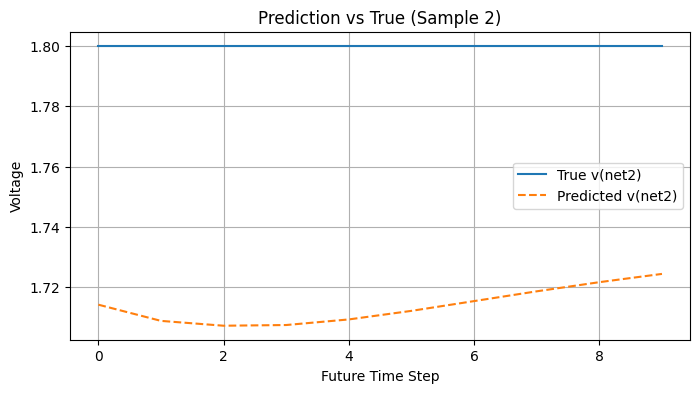

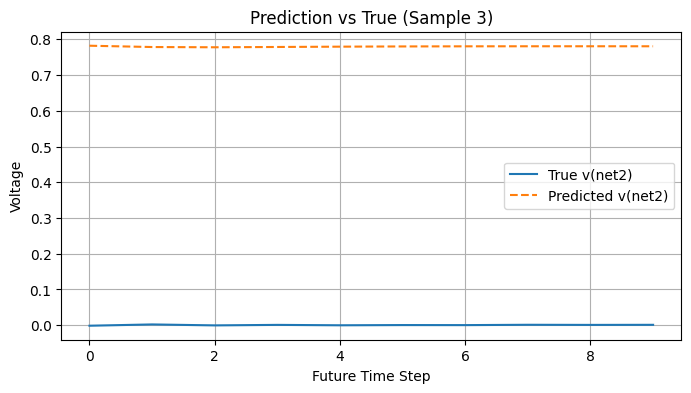

In [1]:
# Trial 2: Full Code Using GRU Model with VCO Dataset (tab-separated .txt)

# ---------------------------------------------
# 1. Upload VCO Dataset (.txt, tab-separated)
# ---------------------------------------------
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()  # Upload your VCO dataset file (e.g., vco_dataset_dc1.txt)

dataframes = []
for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]), sep='\t', header=0)
    dataframes.append(df)
    print(f"Loaded: {filename}, Shape: {df.shape}")

# Combine all files if multiple
combined_df = pd.concat(dataframes, ignore_index=True)
print("\nCombined dataset shape:", combined_df.shape)

# Clean column names
combined_df.columns = [col.strip() for col in combined_df.columns]

# ---------------------------------------------
# 2. Preprocess Data
# ---------------------------------------------
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Ensure numeric types
combined_df['time'] = pd.to_numeric(combined_df['time'], errors='coerce')
combined_df['v(net1)'] = pd.to_numeric(combined_df['v(net1)'], errors='coerce')
combined_df['v(net2)'] = pd.to_numeric(combined_df['v(net2)'], errors='coerce')

# Drop any NaNs
combined_df.dropna(inplace=True)

# Define sequence lengths
T_in = 50    # Input time steps
T_out = 10   # Output time steps

# Normalize signals
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X = combined_df['v(net1)'].values.reshape(-1, 1)
Y = combined_df['v(net2)'].values.reshape(-1, 1)

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

# Create sequences
def create_seq2seq(X, Y, T_in, T_out):
    X_seq, Y_seq = [], []
    for i in range(len(X) - T_in - T_out):
        X_seq.append(X[i:i+T_in])
        Y_seq.append(Y[i+T_in:i+T_in+T_out])
    return np.array(X_seq), np.array(Y_seq)

X_seq, Y_seq = create_seq2seq(X_scaled, Y_scaled, T_in, T_out)
print(f"X_seq shape: {X_seq.shape}, Y_seq shape: {Y_seq.shape}")

# ---------------------------------------------
# 3. Split into Train/Test Sets
# ---------------------------------------------
X_train, X_test, Y_train, Y_test = train_test_split(
    X_seq, Y_seq, test_size=0.2, random_state=42, shuffle=True
)

# ---------------------------------------------
# 4. Build Seq2Seq RNN Model
# ---------------------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, RepeatVector, TimeDistributed

model = Sequential([
    GRU(64, activation='tanh', input_shape=(T_in, 1)),     # Encoder GRU
    Dense(32, activation='relu'),                          # Optional bottleneck dense layer
    RepeatVector(T_out),                                   # Repeat for decoder steps
    GRU(32, return_sequences=True),                        # Decoder GRU
    TimeDistributed(Dense(1))                              # Output layer for each time step
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# ---------------------------------------------
# 5. Train the Model
# ---------------------------------------------
history = model.fit(X_train, Y_train, epochs=30, batch_size=16, validation_split=0.1)

# ---------------------------------------------
# 6. Predict & Evaluate
# ---------------------------------------------
Y_pred = model.predict(X_test)

# Inverse transform
Y_test_inv = scaler_Y.inverse_transform(Y_test.reshape(-1, 1)).reshape(Y_test.shape)
Y_pred_inv = scaler_Y.inverse_transform(Y_pred.reshape(-1, 1)).reshape(Y_pred.shape)

# ---------------------------------------------
# 7. Plot Predictions
# ---------------------------------------------
import matplotlib.pyplot as plt

for i in range(min(3, len(Y_test))):
    plt.figure(figsize=(8, 4))
    plt.plot(Y_test_inv[i], label="True v(net2)")
    plt.plot(Y_pred_inv[i], '--', label="Predicted v(net2)")
    plt.title(f"Prediction vs True (Sample {i+1})")
    plt.xlabel("Future Time Step")
    plt.ylabel("Voltage")
    plt.legend()
    plt.grid(True)
    plt.show()

 Test Sample 1 — MAE: 0.74932, MSE: 0.56150
 Test Sample 2 — MAE: 0.08601, MSE: 0.00743
 Test Sample 3 — MAE: 0.77971, MSE: 0.60795
 Test Sample 4 — MAE: 0.87129, MSE: 0.84786
 Test Sample 5 — MAE: 0.79529, MSE: 0.63249
 Test Sample 6 — MAE: 0.68266, MSE: 0.51366
 Test Sample 7 — MAE: 0.73137, MSE: 0.58325
 Test Sample 8 — MAE: 1.04783, MSE: 1.09803
 Test Sample 9 — MAE: 0.75103, MSE: 0.56408
 Test Sample 10 — MAE: 0.96400, MSE: 0.94422
 Test Sample 11 — MAE: 0.78738, MSE: 0.61996
 Test Sample 12 — MAE: 0.76868, MSE: 0.59086
 Test Sample 13 — MAE: 0.75370, MSE: 0.56807
 Test Sample 14 — MAE: 0.78738, MSE: 0.61996
 Test Sample 15 — MAE: 0.74723, MSE: 0.55835
 Test Sample 16 — MAE: 1.01700, MSE: 1.03434
 Test Sample 17 — MAE: 1.01262, MSE: 1.02541
 Test Sample 18 — MAE: 0.74698, MSE: 0.55798
 Test Sample 19 — MAE: 0.75163, MSE: 0.56499
 Test Sample 20 — MAE: 0.08601, MSE: 0.00743
 Test Sample 21 — MAE: 0.77528, MSE: 0.60499
 Test Sample 22 — MAE: 1.01262, MSE: 1.02541
 Test Sample 23 — M

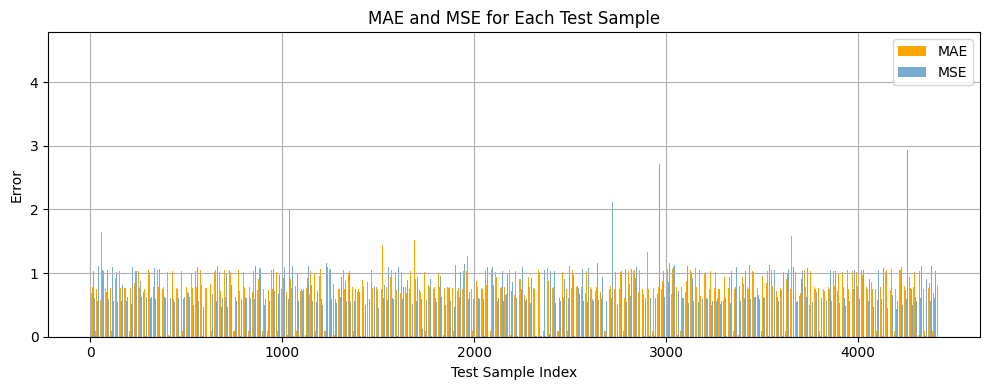

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store MAE and MSE
mae_list = []
mse_list = []

# Loop through each test sample
for i in range(len(Y_test_inv)):
    true = Y_test_inv[i].flatten()
    pred = Y_pred_inv[i].flatten()
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    mae_list.append(mae)
    mse_list.append(mse)
    print(f" Test Sample {i+1} — MAE: {mae:.5f}, MSE: {mse:.5f}")

# Plotting
plt.figure(figsize=(10, 4))
x = np.arange(1, len(Y_test_inv) + 1)
plt.bar(x - 0.2, mae_list, width=0.4, label="MAE", color='orange')
plt.bar(x + 0.2, mse_list, width=0.4, label="MSE", alpha=0.6)
plt.xlabel("Test Sample Index")
plt.ylabel("Error")
plt.title("MAE and MSE for Each Test Sample")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# -----------------------------
# 9. Upload and Process Test Sequences (with automatic padding/truncation)
# -----------------------------
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import files
import io
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

print("\n Upload your test Excel files (with Time, Vin, Vout1, R1, C1, ... columns)")
uploaded_test = files.upload()

# Load all uploaded test files
test_dataframes = []
for filename in uploaded_test.keys():
    df_test = pd.read_excel(io.BytesIO(uploaded_test[filename]))
    test_dataframes.append(df_test)
    print(f" Loaded: {filename}, Shape: {df_test.shape}")

# Combine all test files
combined_test_df = pd.concat(test_dataframes, ignore_index=True)
print("\n Combined test dataset shape:", combined_test_df.shape)

# Define constants
T = X_seq.shape[1]  # Sequence length used during training
circuits = 10       # Number of Vout/R/C channels

# Extract test sequences
vin_ext = []
vout_ext = []
r_c_ext = []

samples_ext = combined_test_df['Time'].nunique()
T_test = samples_ext
samples = len(combined_test_df) // T_test

for i in range(samples):
    start = i * T_test
    end = start + T_test
    vin = combined_test_df['Vin'][start:end].values.reshape(-1, 1)
    vin_ext.append(vin)

    vout = np.array([combined_test_df[f'Vout{j}'][start:end].values for j in range(1, circuits + 1)])
    vout_ext.append(vout)

    r_c = [[combined_test_df[f'R{j}'][start], combined_test_df[f'C{j}'][start]] for j in range(1, circuits + 1)]
    r_c_ext.append(r_c)

vin_ext = np.array(vin_ext)         # Shape: (samples, T_test, 1)
vout_ext = np.array(vout_ext)       # Shape: (samples, circuits, T_test)
r_c_ext = np.array(r_c_ext)         # Shape: (samples, circuits, 2)

# Reshape to match training format
X_seq_ext = np.repeat(vin_ext, circuits, axis=0)       # (samples * circuits, T_test, 1)
X_static_ext = r_c_ext.reshape(-1, 2)                   # (samples * circuits, 2)
Y_ext = vout_ext.reshape(-1, T_test)                    # (samples * circuits, T_test)

# Normalize using same training scalers
for i in range(X_seq_ext.shape[0]):
    X_seq_ext[i] = scaler_seq.transform(X_seq_ext[i])  # Use same scaler, no fit here

X_static_ext = scaler_static.transform(X_static_ext)

# Pad or truncate sequences to match training length T
X_seq_ext_padded = pad_sequences(
    [seq.squeeze() for seq in X_seq_ext],
    maxlen=T,
    dtype='float32',
    padding='post',
    truncating='post'
)
X_seq_ext_padded = np.expand_dims(X_seq_ext_padded, axis=-1)

# Pad/Truncate target sequences as well
Y_ext_padded = pad_sequences(
    Y_ext,
    maxlen=T,
    dtype='float32',
    padding='post',
    truncating='post'
)

# -----------------------------
# 10. Predict and Evaluate on Test Sequences
# -----------------------------
preds_ext = model.predict([X_seq_ext_padded, X_static_ext])
Y_pred_inv_ext = scaler_out.inverse_transform(preds_ext)
Y_true_inv_ext = scaler_out.inverse_transform(Y_ext_padded)

mae_list_ext = []
mse_list_ext = []

for i in range(len(Y_true_inv_ext)):
    true = Y_true_inv_ext[i]
    pred = Y_pred_inv_ext[i]
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    mae_list_ext.append(mae)
    mse_list_ext.append(mse)
    print(f"[Test] Circuit {i+1:2d} — MAE: {mae:.5f}, MSE: {mse:.5f}")

# -----------------------------
# 11. Plot Example Predictions
# -----------------------------
for i in range(min(3, len(Y_pred_inv_ext))):
    plt.figure(figsize=(10, 4))
    plt.plot(Y_true_inv_ext[i], label="True Vout")
    plt.plot(Y_pred_inv_ext[i], '--', label="Predicted Vout")
    plt.title(f"[Test] Prediction vs True - Circuit {i+1}")
    plt.xlabel("Time Step")
    plt.ylabel("Vout")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()